In [15]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
%matplotlib inline

In [16]:
target_db = 'dft-mot-results-and-test-items-2005-to-2020.sqlite'
con = sqlite3.connect(target_db)

In [17]:
df = pd.read_sql_query("""
    SELECT count(*) AS count
    FROM tests
""", con)
df

,count
0,551156668


In [18]:
df = pd.read_sql_query("""
    SELECT make, count(*) AS count
    FROM tests
    WHERE test_class_id=4
    GROUP BY make
    ORDER BY count DESC
    LIMIT 30
""", con)
df.set_index(['make'],inplace=True)
df

,count
make,
FORD,82828425
VAUXHALL,65070483
VOLKSWAGEN,42427312
PEUGEOT,33558312
RENAULT,29739403
TOYOTA,23105501
NISSAN,22162338
BMW,21396662
CITROEN,20749760


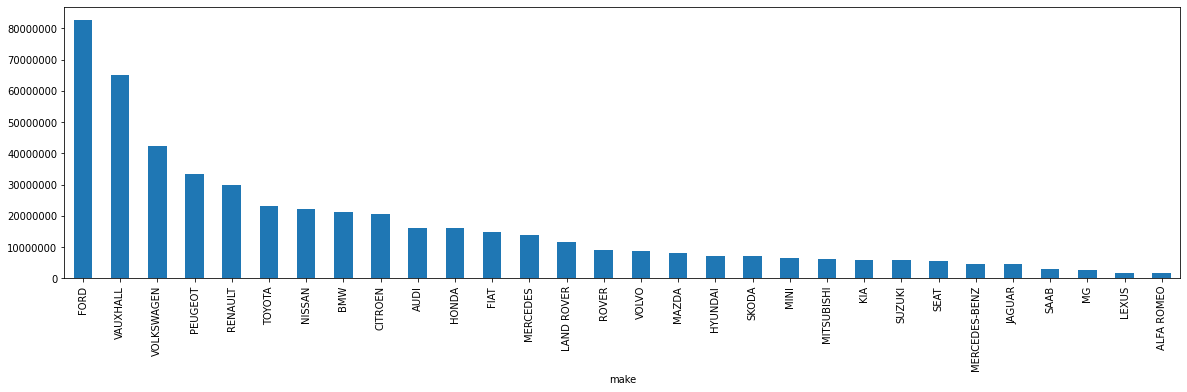

In [19]:
df.plot(kind='bar', figsize=(20,5), legend=None)
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [20]:
df = pd.read_sql_query("""
    SELECT strftime('%Y', test_date) as year, count(*) AS count
    FROM tests
    WHERE test_class_id=4
    GROUP BY year
    ORDER BY year
""", con)
df

,year,count
0,2005,7113089
1,2006,30302568
2,2007,31803974
3,2008,32591753
4,2009,33529083
5,2010,34179326
6,2011,34790696
7,2012,34831846
8,2013,35346508
9,2014,35458346


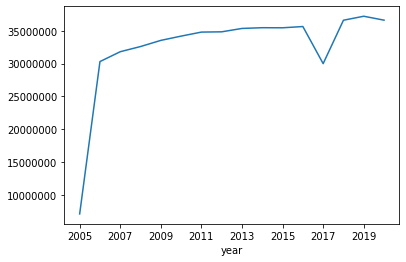

In [24]:
df_by_year = df.set_index(['year'])
df_by_year.plot(legend=None)
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
plt.show()